In [120]:
#Exploring linear regression

u = [1,1]
v = [2,4]
w = [5,3]
a1 = 2(v .- u)
b1 = sum(v.^2) - sum(u.^2)
println(a1)
println(b1)

a2 = 2(w .- u)
b2 = sum(w.^2) - sum(u.^2)
println(a2)
println(b2)

a3 = 2(w .- v)
b3 = sum(w.^2) - sum(v.^2)
println(a3)
println(b3)

[2, 6]
18
[8, 4]
32
[6, -2]
14


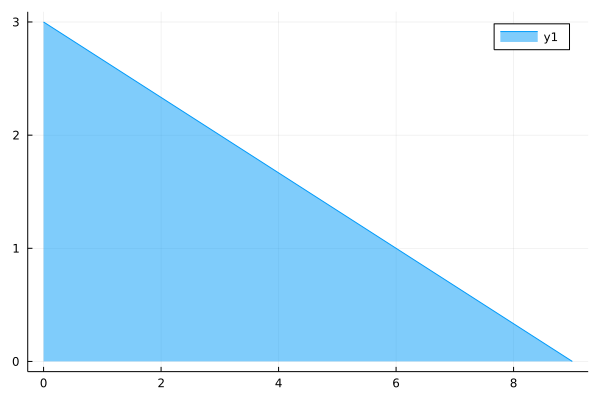

In [122]:
using Plots

x = range(0, stop=9, length=5000)
y1 = (18 .- 2x)/6
plot(x, y1, fill = (0, 0.5, :auto))

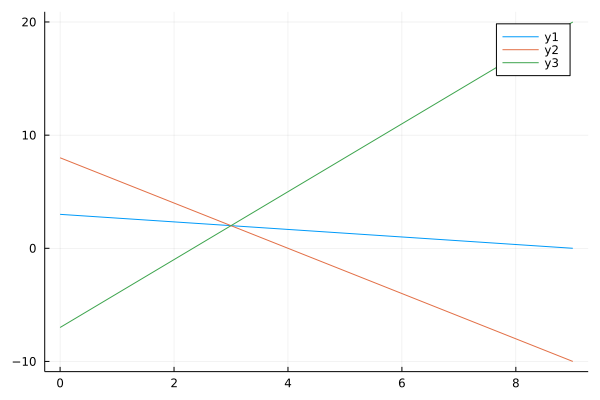

In [123]:
y2 = (32 .- 8x)/4
y3 = -(14 .- 6x)/2
plot(x, y1)
plot!(x, y2)
plot!(x, y3)

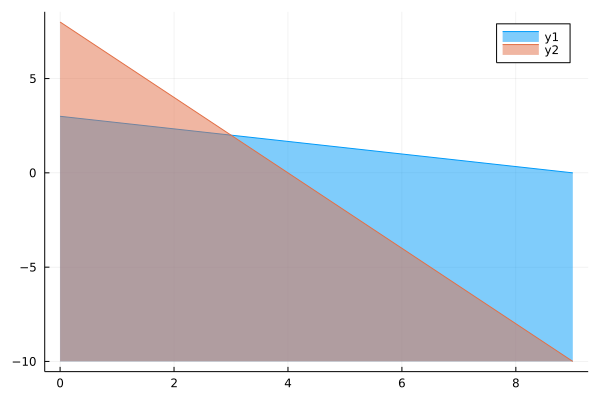

In [124]:
plot(x, y1, fill = (-10, 0.5, :auto))
plot!(x, y2, fill = (-10, 0.5, :auto))

In [80]:
include("readclassjson.jl")

data = readclassjson("all_pairs_data.json")
U = data["U"]
v = data["v"]

1000-element Vector{Float64}:
  1.0876464898659608
  1.7645385202643007
  0.7988243502215318
  1.7719910184735086
  1.218350236502528
  2.3302509128645776
  0.8333794737500034
  1.308622947681442
  1.4035510806008924
  2.2502497009412736
  2.6087613641450753
  3.2248947108747794
  1.2066286872567438
  ⋮
  0.42619146881969233
  1.1104852518937032
  1.2546259910803375
  0.9278480510203796
  1.5709290441879151
  1.4585094609273486
  0.9766892570760033
  0.7320807944053143
  0.8899092096404575
  2.15680807938989
  0.42532703660192617
 -1.2914085036703877

In [87]:
U_train = U[1:500,:]
U_test = U[501:1000,:]
v_train = v[1:500]
v_test = v[501:1000]

500-element Vector{Float64}:
  0.4823077713293235
  1.3767449324760999
  1.0504357713635442
  1.3468252121230289
  1.3009251986368027
  0.7601838286281395
  1.3687391911052709
  1.0820241895208504
  1.0491509253405735
  1.1220108182327828
  1.24259838318317
 -0.16968513637997007
 -0.01856337191906962
  ⋮
  0.42619146881969233
  1.1104852518937032
  1.2546259910803375
  0.9278480510203796
  1.5709290441879151
  1.4585094609273486
  0.9766892570760033
  0.7320807944053143
  0.8899092096404575
  2.15680807938989
  0.42532703660192617
 -1.2914085036703877

In [88]:
theta = U_train \ v_train

3-element Vector{Float64}:
 0.24676838935831918
 0.023385840044263976
 0.08960800975176143

In [133]:
function rms(y, yhat)
    return sqrt(sum((yhat .- y).^2)/500)
end

#train RMSE
println(rms(v_train, U_train*theta))
#test RMSE
println(rms(v_test, U_test*theta))

1.4541336310047954
1.439914316093753


In [139]:
A = zeros(1000, 13)
for i in 1:1000
    A[i,1] = 1
    A[i,2:4] = U[i,1:3]
    A[i,5] = U[i,1]^2
    A[i,6] = U[i,2]^2
    A[i,7] = U[i,3]^2
    A[i,8] = U[i,1]*U[i,2]
    A[i,9] = U[i,1]*U[i,3]
    A[i,10] = U[i,2]*U[i,1]
    A[i,11] = U[i,2]*U[i,3]
    A[i,12] = U[i,3]*U[i,1]
    A[i,13] = U[i,3]*U[i,2]
end
A_train = A[1:500,:]
A_test = A[501:1000,:]
new_theta = A_train \ v_train

13-element Vector{Float64}:
  0.9970236913439604
  0.2019240408353682
 -0.0015258866170315222
 -0.004093435218566886
 -0.0020437568491987424
  0.0011982372851922975
  0.0005211748232657881
  0.3503827113974666
 -0.2005986952860463
  0.35038271139746663
  0.30135033235814146
 -0.20059869528604643
  0.3013503323581415

In [131]:
#train RMSE
println(rms(v_train, A_train*new_theta))
#test RMSE
println(rms(v_test, A_test*new_theta))

0.09789711431350949
0.0973962144415463


In [132]:
new_theta

13-element Vector{Float64}:
  0.9970236913439604
  0.2019240408353682
 -0.0015258866170315222
 -0.004093435218566886
 -0.0020437568491987424
  0.0011982372851922975
  0.0005211748232657881
  0.3503827113974666
 -0.2005986952860463
  0.35038271139746663
  0.30135033235814146
 -0.20059869528604643
  0.3013503323581415

In [138]:
A_new = zeros(1000, 8)
A_new[:,1:2] = A[:,1:2]
A_new[:,3:8] = A[:,8:13]

A_new_train = A_new[1:500,:]
A_new_test = A_new[501:1000,:]
c_theta = A_new_train \ v_train

8-element Vector{Float64}:
  0.9964276179998206
  0.20171844687537938
  0.3505204746362437
 -0.20067764218620077
  0.35052047463624375
  0.30139985329077806
 -0.2006776421862007
  0.30139985329077806

In [137]:
#train RMSE
println(rms(v_train, A_new_train*c_theta))
#test RMSE
println(rms(v_test, A_new_test*c_theta))

0.09804921102427054
0.09736842831870961
